# From .xyz to gridded data with verde.spline()

In [1]:
%matplotlib notebook

import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyproj
from shapely import geometry

import verde as vd
#import pooch
import rasterio as rio

plt.rcParams['figure.dpi'] = 120

### Frist step is a search in the report to verify some metadata such as the name of the columns and its measure units, flight mean velocity and height, frequency of the sensors.

### Then, secondly, we can open the XYZ. file with a text editor to visualize the number of headlines, what are the separetors, etc. With this information, we can chose which collumn and lines to export to the data frame with pandas library.

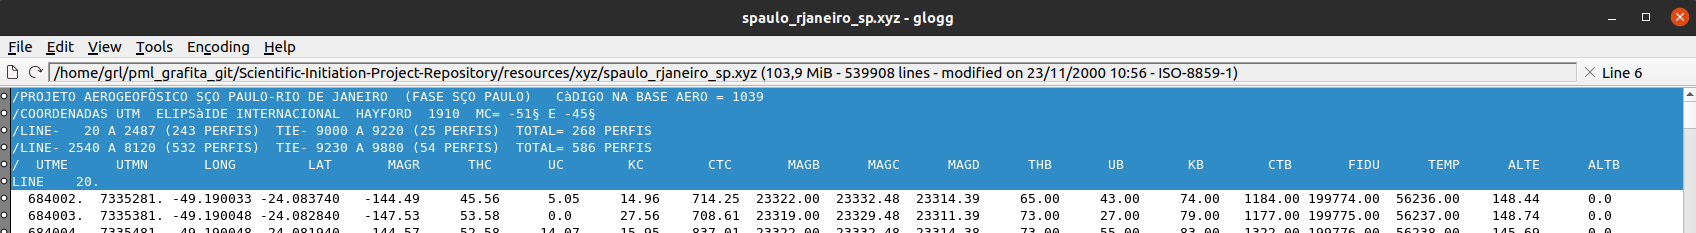

In [2]:
g1039_cols = 'UTME UTMN LONG LAT MAGR THC UC KC CTC MAGB MAGC MAGD THB UB KB CTB FIDU TEMP ALTE ALTB'.split(" ")
g1039_cols

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['UTME',
 'UTMN',
 'LONG',
 'LAT',
 'MAGR',
 'THC',
 'UC',
 'KC',
 'CTC',
 'MAGB',
 'MAGC',
 'MAGD',
 'THB',
 'UB',
 'KB',
 'CTB',
 'FIDU',
 'TEMP',
 'ALTE',
 'ALTB']

In [3]:
gama_1039 = pd.read_csv('../../resources/xyz/spaulo_rjaneiro_sp.xyz',
                        names=g1039_cols,
                        delim_whitespace=True,
                        skiprows=6,
                        usecols=['UTME','UTMN','LONG','LAT',
                                 'MAGR','THC','UC','KC','CTC'])
gama_1039

,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC
0,684002.,7335281.0,-49.190033,-24.083740,-144.49,45.56,5.05,14.96,714.25
1,684003.,7335381.0,-49.190048,-24.082840,-147.53,53.58,0.00,27.56,708.61
2,684004.,7335481.0,-49.190048,-24.081940,-144.57,52.58,14.07,15.95,837.01
3,684005.,7335581.0,-49.190048,-24.081039,-146.61,51.68,0.00,46.94,862.91
4,684006.,7335681.0,-49.190048,-24.080124,-156.65,62.20,21.64,12.20,898.35
...,...,...,...,...,...,...,...,...,...
539897,329329.,7563776.0,-46.653473,-22.022064,92.53,70.13,20.86,245.36,2177.98
539898,329426.,7563774.0,-46.652527,-22.022095,100.51,54.54,19.79,279.66,2144.92
539899,329523.,7563771.0,-46.651596,-22.022125,100.50,74.22,19.75,236.94,2081.99
539900,329620.,7563769.0,-46.650650,-22.022156,96.48,68.61,5.81,235.28,1978.74


### Using 'df.sort_values('axis')' we can visualize some str values, they are metadata about the flight lines. So we can delete thoose lines with 'df.dropna()'.

In [4]:
gama_1039.sort_values('UTME')

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC
516978,194730.,7354528.0,-47.997772,-23.891388,151.79,12.54,0.00,0.00,55.25
162356,194755.,7362580.0,-47.995865,-23.818756,101.06,17.66,0.00,0.00,158.68
162355,194756.,7362680.0,-47.995834,-23.817856,100.02,16.04,11.36,0.00,193.51
162354,194757.,7362780.0,-47.995789,-23.816956,98.98,12.71,9.15,0.00,177.03
162353,194758.,7362880.0,-47.995758,-23.816055,97.94,16.53,7.97,7.16,195.36
...,...,...,...,...,...,...,...,...,...
511246,TIE,9350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510509,TIE,9340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510266,TIE,9330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509434,TIE,9310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gama_1039.dropna(inplace=True)
gama_1039

,UTME,UTMN,LONG,LAT,MAGR,THC,UC,KC,CTC
0,684002.,7335281.0,-49.190033,-24.083740,-144.49,45.56,5.05,14.96,714.25
1,684003.,7335381.0,-49.190048,-24.082840,-147.53,53.58,0.00,27.56,708.61
2,684004.,7335481.0,-49.190048,-24.081940,-144.57,52.58,14.07,15.95,837.01
3,684005.,7335581.0,-49.190048,-24.081039,-146.61,51.68,0.00,46.94,862.91
4,684006.,7335681.0,-49.190048,-24.080124,-156.65,62.20,21.64,12.20,898.35
...,...,...,...,...,...,...,...,...,...
539897,329329.,7563776.0,-46.653473,-22.022064,92.53,70.13,20.86,245.36,2177.98
539898,329426.,7563774.0,-46.652527,-22.022095,100.51,54.54,19.79,279.66,2144.92
539899,329523.,7563771.0,-46.651596,-22.022125,100.50,74.22,19.75,236.94,2081.99
539900,329620.,7563769.0,-46.650650,-22.022156,96.48,68.61,5.81,235.28,1978.74


### Now, we have to create a geometry collumn with a projection coordinate system.

In [8]:
gama_1039['geometry'] = [geometry.Point(x, y) for x, y in zip(gama_1039['UTME'], gama_1039['UTMN'])]

crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"

gama_1039 = gpd.GeoDataFrame(gama_1039, geometry='geometry',crs=crs)


#projection = pyproj.Proj(proj='utm', zone='23s', EPGS ='32723')

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: must be real number, not str

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


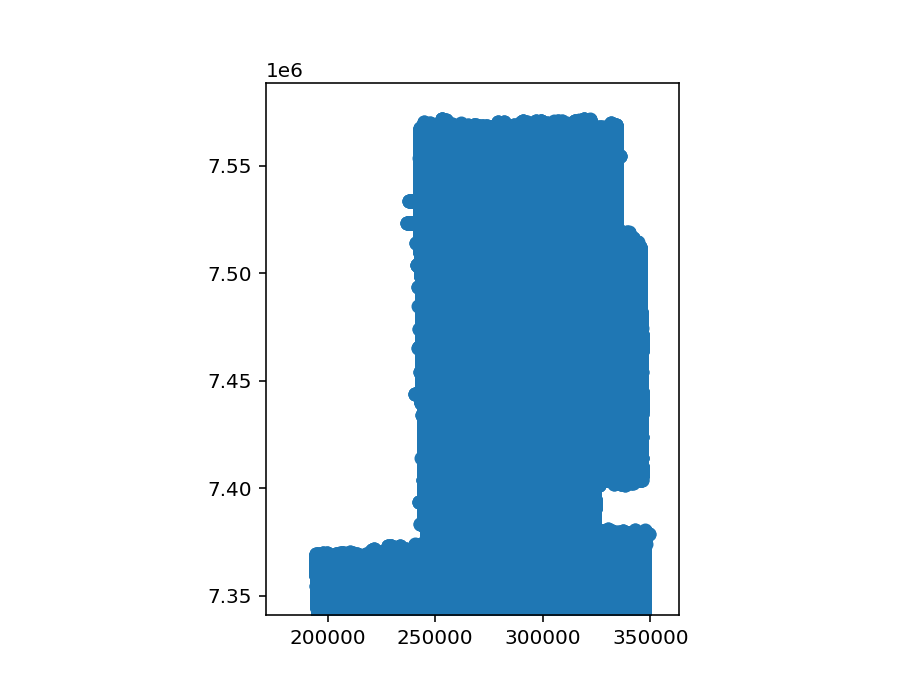

<AxesSubplot:>

In [12]:
gama_1039.plot()

###  bounds


7.640.000 7.450.000

  420.000   290.000


-46.6257667541503977, -22.7087249755858984 
-46.4997558593750000, -22.5829296112061009


### Socorro_1039

In [82]:
scrr_1039 = gama_1039[vd.inside((gama_1039.UTME, gama_1039.UTMN), region= [290000, 345000,
                                                                         7455000, 7510000])]

<IPython.core.display.Javascript object>


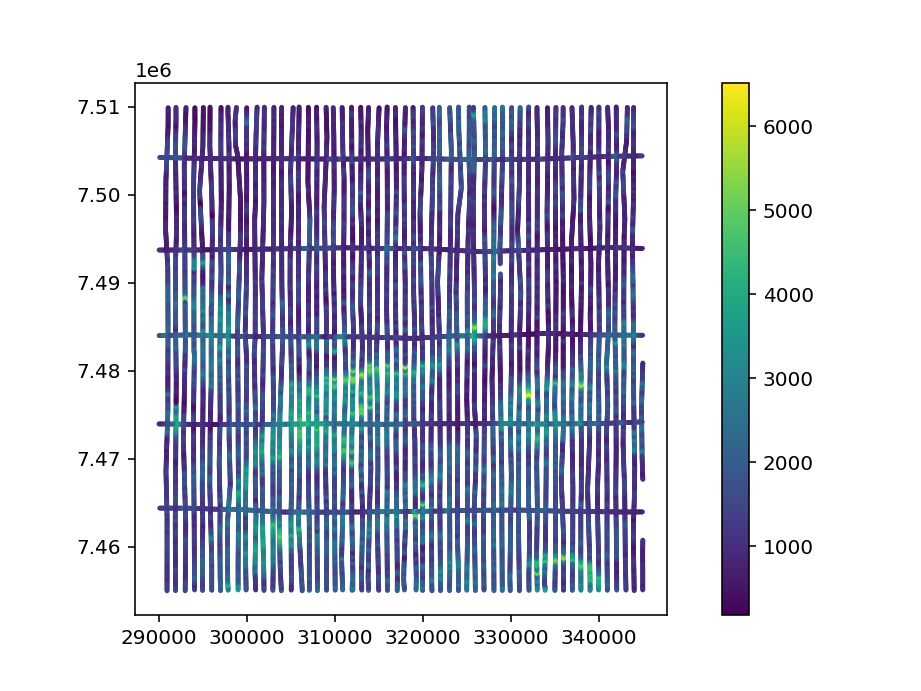

(287253.15, 347749.85, 7452251.2, 7512746.8)

In [83]:
plt.figure()
plt.scatter(scrr_1039.UTME, scrr_1039.UTMN,
            c=scrr_1039.CTC,
            s=2)
plt.colorbar()
plt.axis('scaled')

### Grinding with verde.Spline()

In [84]:
coordinates = (scrr_1039.UTME.values, scrr_1039.UTMN.values)
coordinates

(array([291046., 291046., 291046., ..., 344721., 344823., 344924.]),
 array([7509903., 7509806., 7509708., ..., 7504430., 7504431., 7504432.]))

### Create a regular grid, decimating the data reducing the alliasing effect by a fuction called reduce.

In [135]:
reducer = vd.BlockReduce(np.median, spacing= 1000)

In [136]:
b_coords, b_MAGR = reducer.filter(coordinates, scrr_1039.MAGR)
b_MAGR.shape

(2451,)

###  Here we visualize the residual points after the blocked reductionm and observe that the sampled points are not perfect

<IPython.core.display.Javascript object>


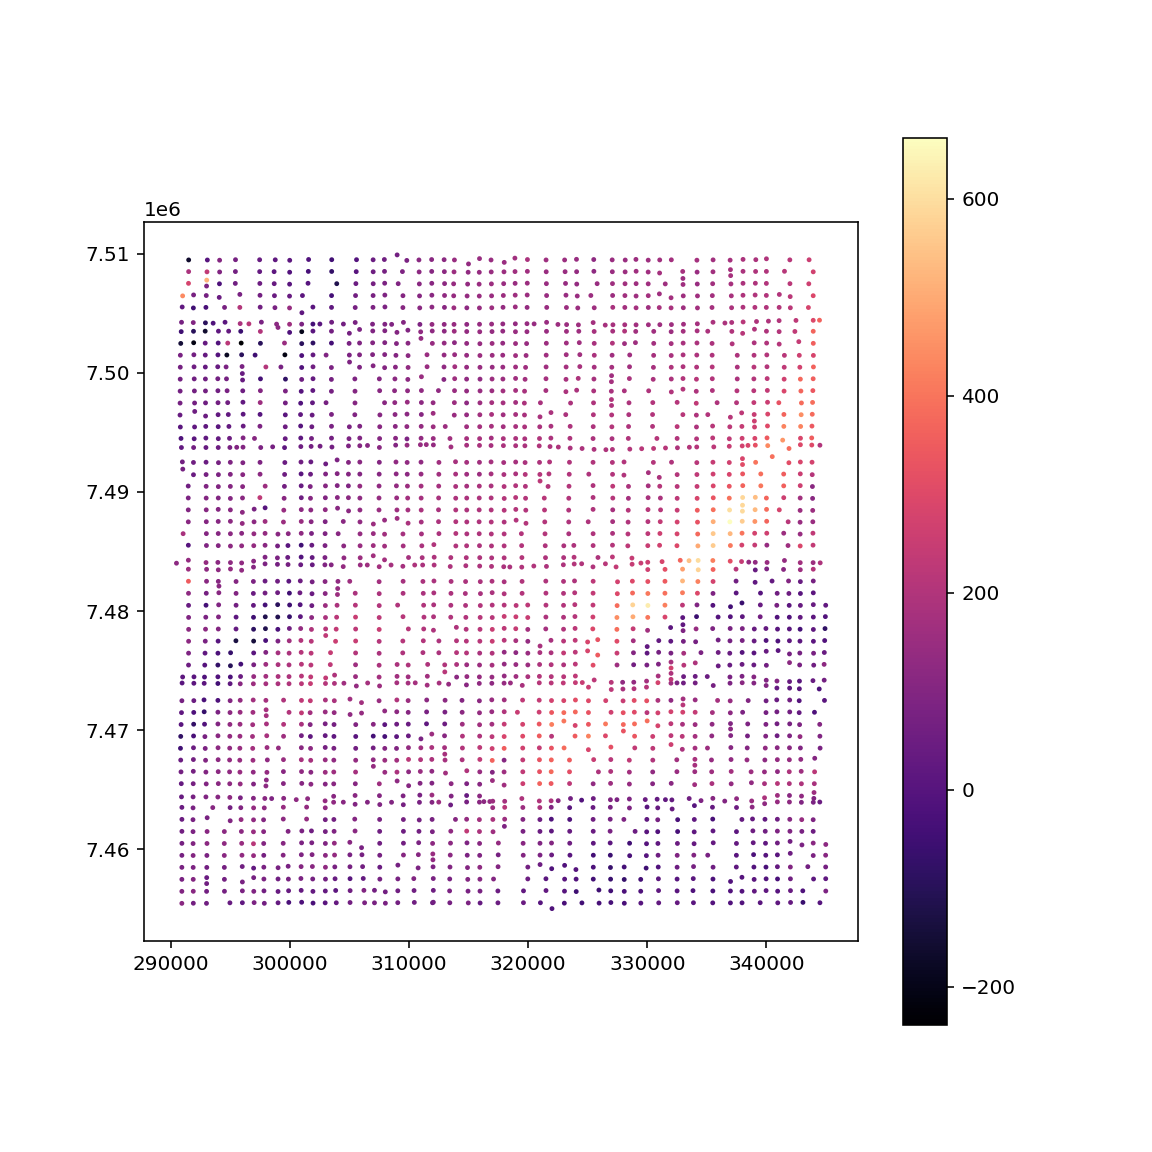

In [137]:
plt.figure(figsize=(8,8))
plt.scatter(b_coords[0],b_coords[1],
            c    = b_MAGR,
            cmap = 'magma',
            s    = 2)
plt.axis('scaled')
plt.colorbar()

In [138]:
spline = vd.Spline()

In [139]:
spline.fit(b_coords, b_MAGR)

Spline()

###  Predicting the real non decimated data

In [140]:
predicted = spline.predict(coordinates)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


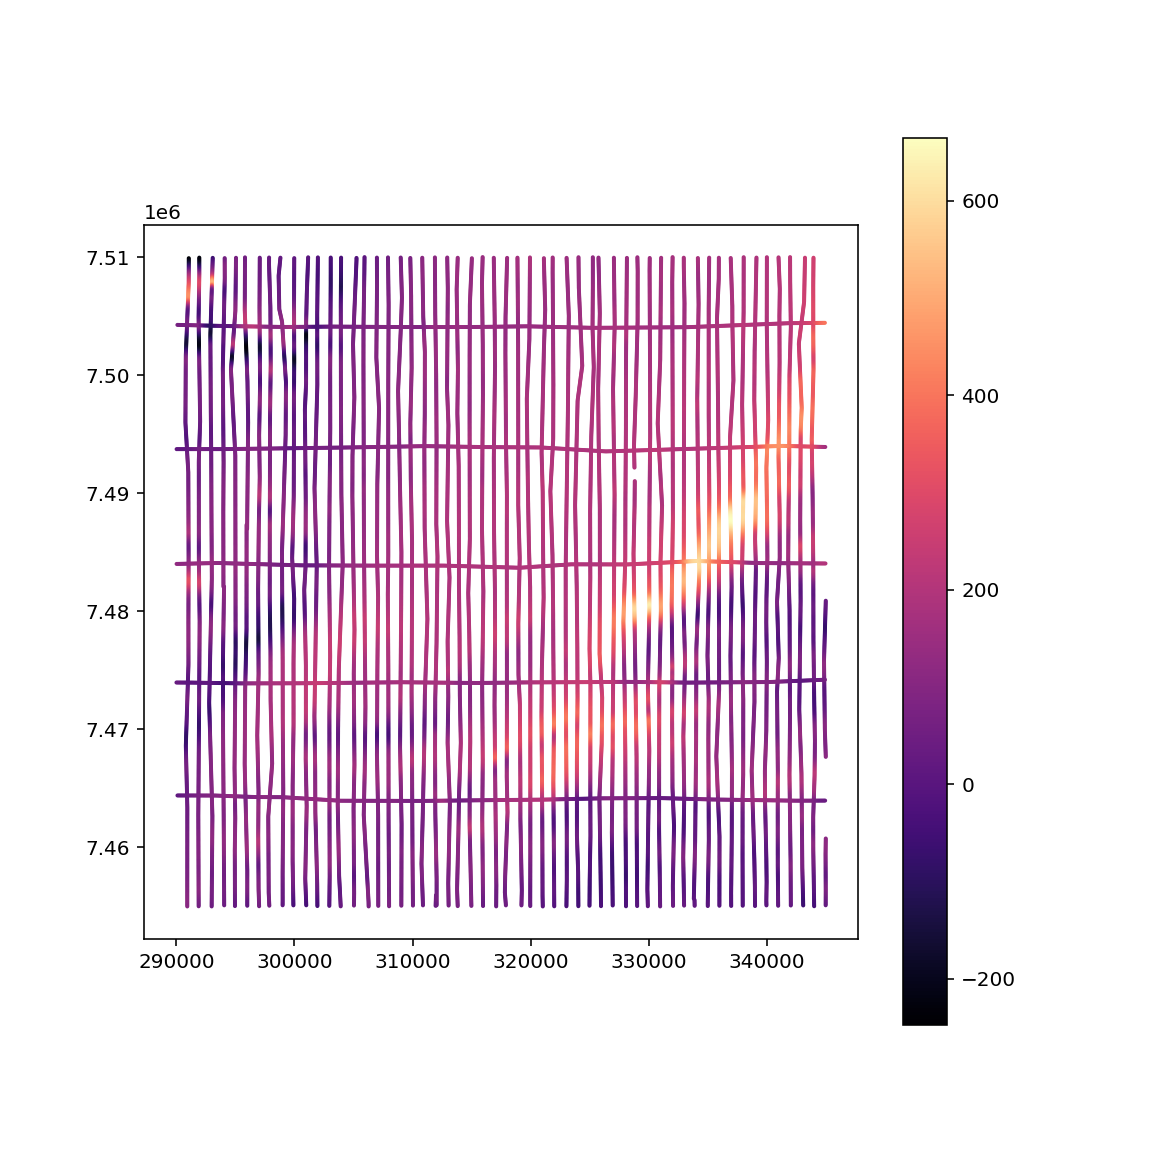

In [141]:
plt.figure(figsize=(8,8))
plt.scatter(coordinates[0],coordinates[1],
            c=predicted,
            cmap='magma',
            s=1)
plt.axis('scaled')
plt.colorbar()

### Calculating the difference between the raw data and the predicted.

In [143]:
residuals = scrr_1039.MAGR - predicted

<IPython.core.display.Javascript object>


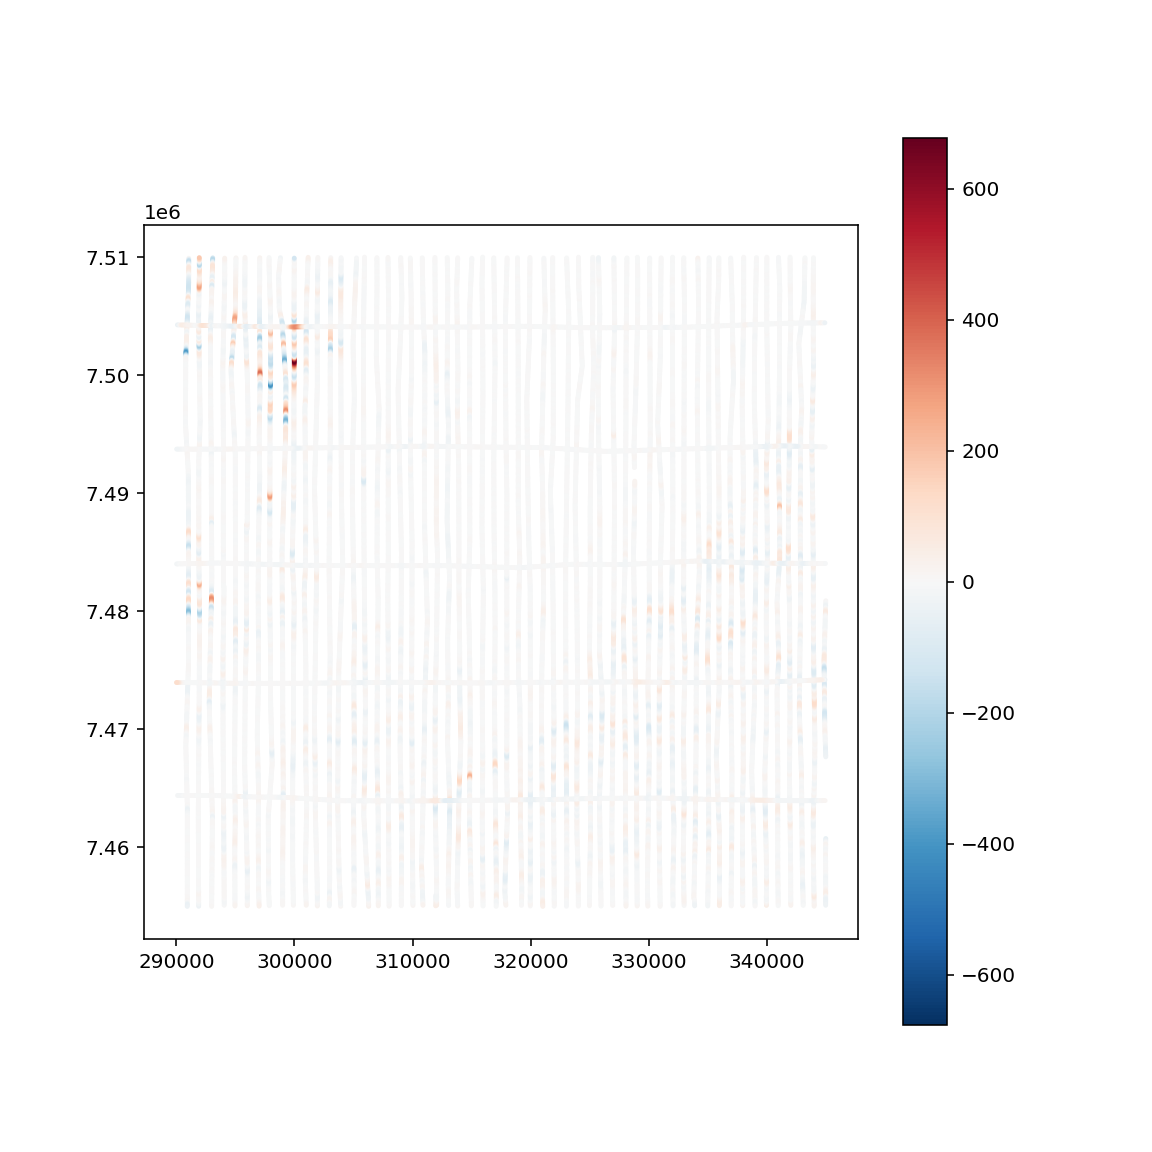

In [144]:
scale = vd.maxabs(residuals)

plt.figure(figsize=(8,8))
plt.scatter(coordinates[0],coordinates[1],
            c=residuals,
            cmap='RdBu_r',
            s=2,
            vmin=-scale,vmax=scale)
plt.axis('scaled')
plt.colorbar()

###  Now generating a pixel data from point data

In [145]:
region = vd.get_region(coordinates)
grid_coords = vd.grid_coordinates(region, spacing = 200)

# This griding resolution is 5x the real data resolution (1000m)

In [146]:
grid_MAGR = spline.predict(grid_coords)

<IPython.core.display.Javascript object>


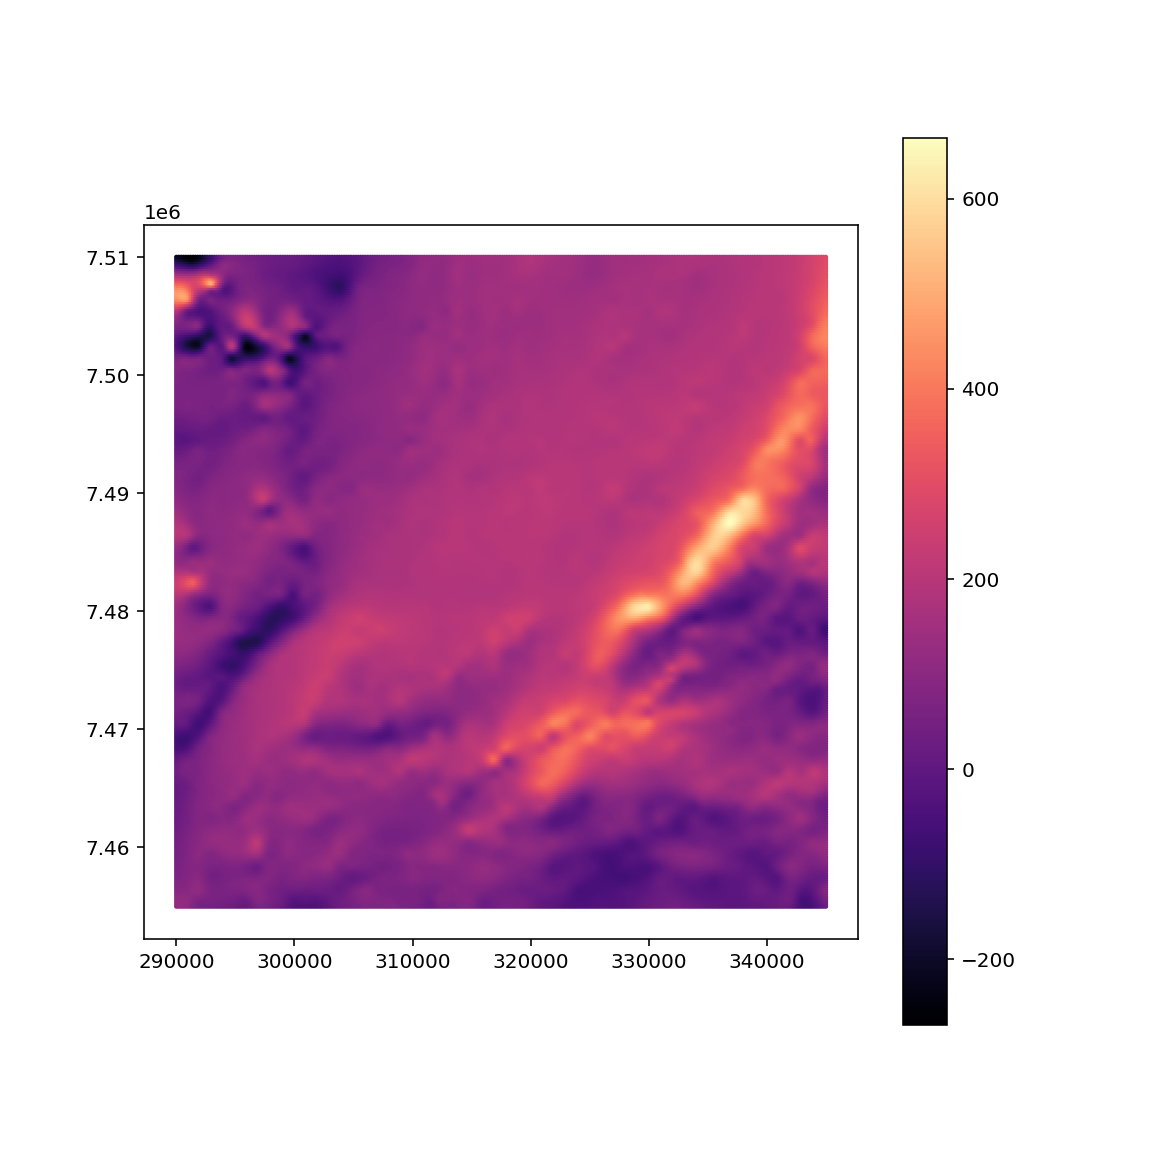

In [147]:
plt.figure(figsize=(8,8))
plt.scatter(grid_coords[0], grid_coords[1],
            c=grid_MAGR,
            cmap='magma',
            s=2)
plt.axis('scaled')
plt.colorbar()

In [148]:
grid = spline.grid(spacing=200, data_names=['MAGR'])
grid

<xarray.Dataset>
Dimensions:   (easting: 274, northing: 275)
Coordinates:
  * easting   (easting) float64 2.905e+05 2.907e+05 ... 3.448e+05 3.45e+05
  * northing  (northing) float64 7.455e+06 7.455e+06 ... 7.51e+06 7.51e+06
Data variables:
    MAGR      (northing, easting) float64 114.9 112.5 107.8 ... 286.5 292.0
Attributes:
    metadata:  Generated by Spline()

<IPython.core.display.Javascript object>


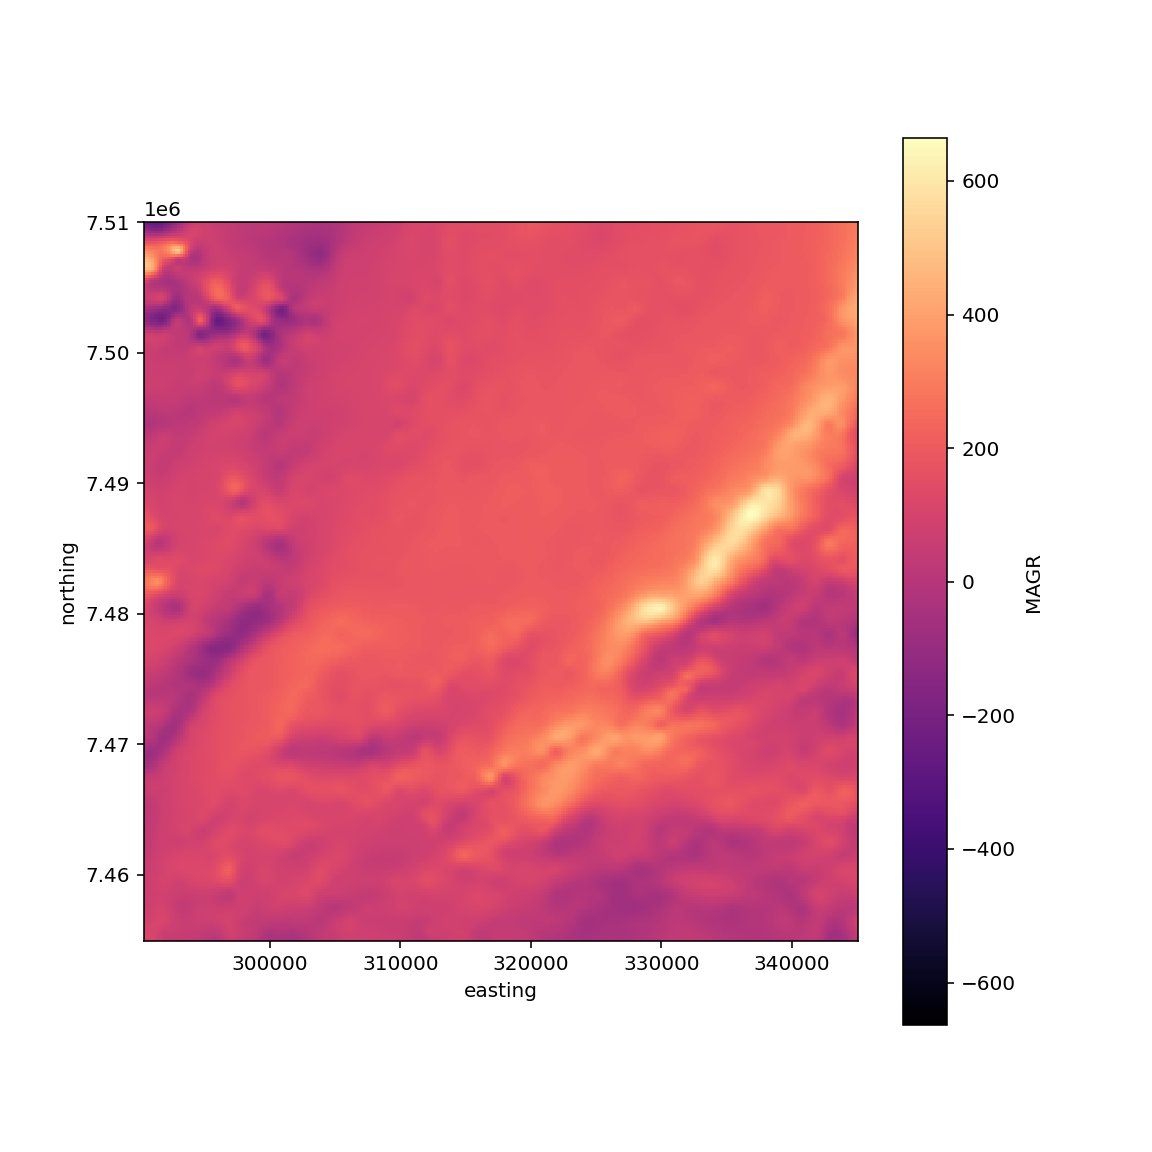

(290366.63095238095,
 345094.86904761905,
 7454911.8211678825,
 7510010.1788321175)

In [149]:
grid.MAGR.plot(figsize=(8,8),
               cmap='magma')
plt.axis('scaled')

### Eliminating pixels that is too fars from a real surveyed value

<IPython.core.display.Javascript object>


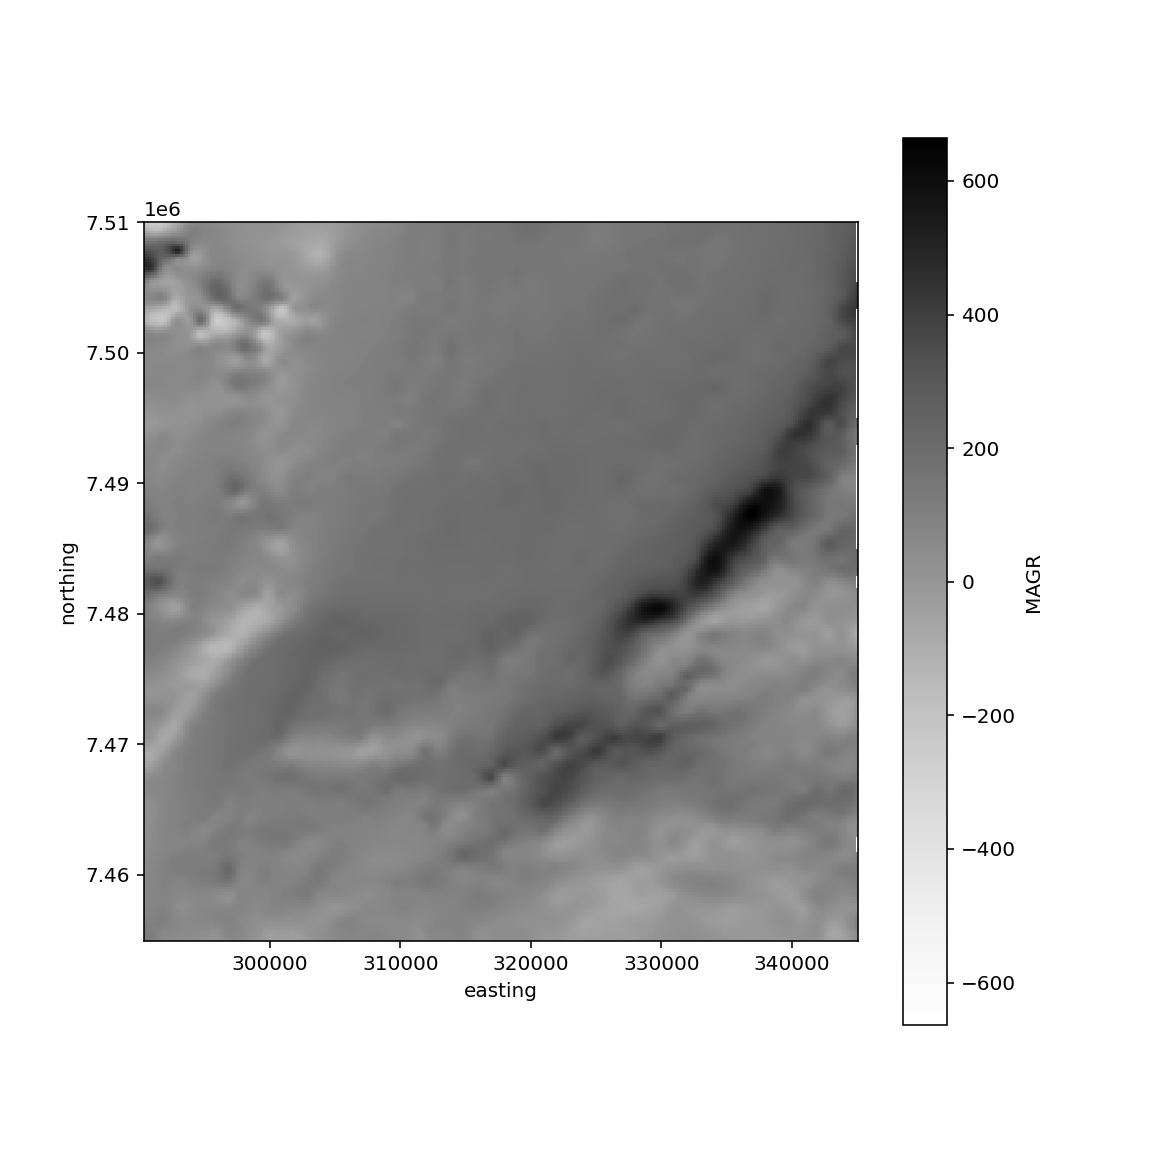

(290366.63095238095,
 345094.86904761905,
 7454911.8211678825,
 7510010.1788321175)

In [151]:
grid = vd.distance_mask(coordinates, maxdist=1000, grid=grid)
grid

grid.MAGR.plot(figsize=(8,8),cmap='Greys')
plt.axis('scaled')

###  Chanining operations

In [152]:
chain_MAGR = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=1000)),
    ('spline', vd.Spline()),
])

### Then we fit within the chain

In [154]:
chain_MAGR.fit(coordinates, scrr_1039.MAGR)

Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f9de8c7d550>,
                          spacing=1000)),
             ('spline', Spline())])

<IPython.core.display.Javascript object>


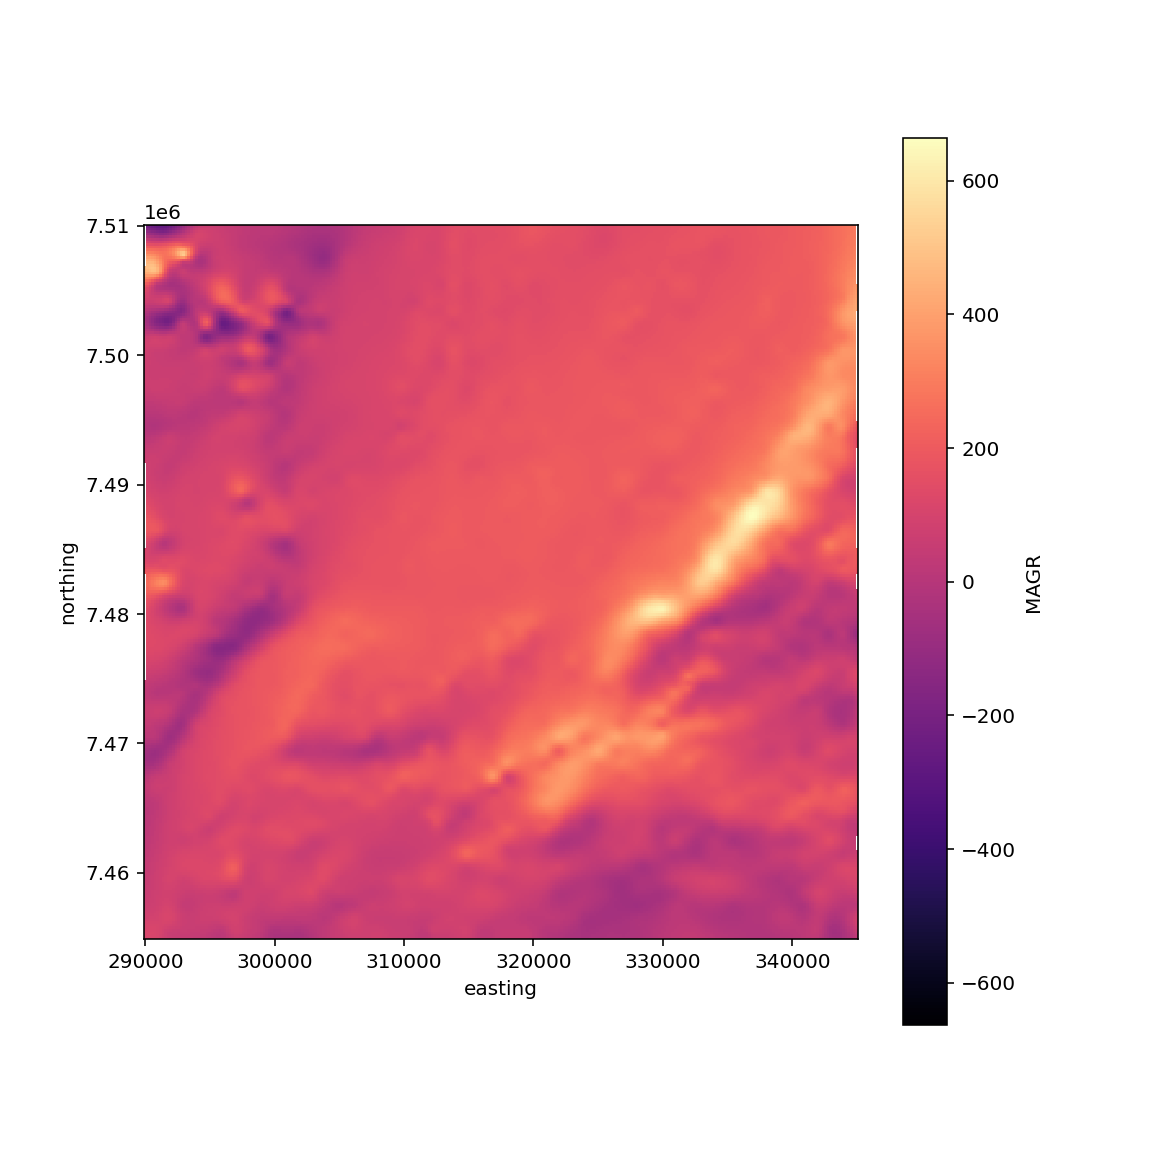

(289903.0054545455, 345099.9945454545, 7454901.007272728, 7510096.992727272)

In [157]:
MAGR_grid = chain_MAGR.grid(spacing=200, data_names=['MAGR'])
MAGR_grid = vd.distance_mask(coordinates, maxdist=1000, grid=MAGR_grid)
MAGR_grid.MAGR.plot(figsize=(8,8), cmap='magma')
plt.axis('scaled')

### Model Validation

In [158]:
train, test = vd.train_test_split(coordinates, scrr_1039.MAGR,
                                 test_size = 0.1)

### Here we can visualize the train information:
    1- two arrays representing coordinates;
    2- a touple of one array of data training set
    3- a column representing the wheights of the dataset

In [159]:
train

((array([304906., 299020., 321700., ..., 315932., 337038., 335881.]),
  array([7491154., 7469057., 7489364., ..., 7503706., 7461737., 7463890.])),
 (array([ 95.36, 133.66, 209.99, ..., 144.65, -12.14,  46.31]),),
 (None,))

<IPython.core.display.Javascript object>


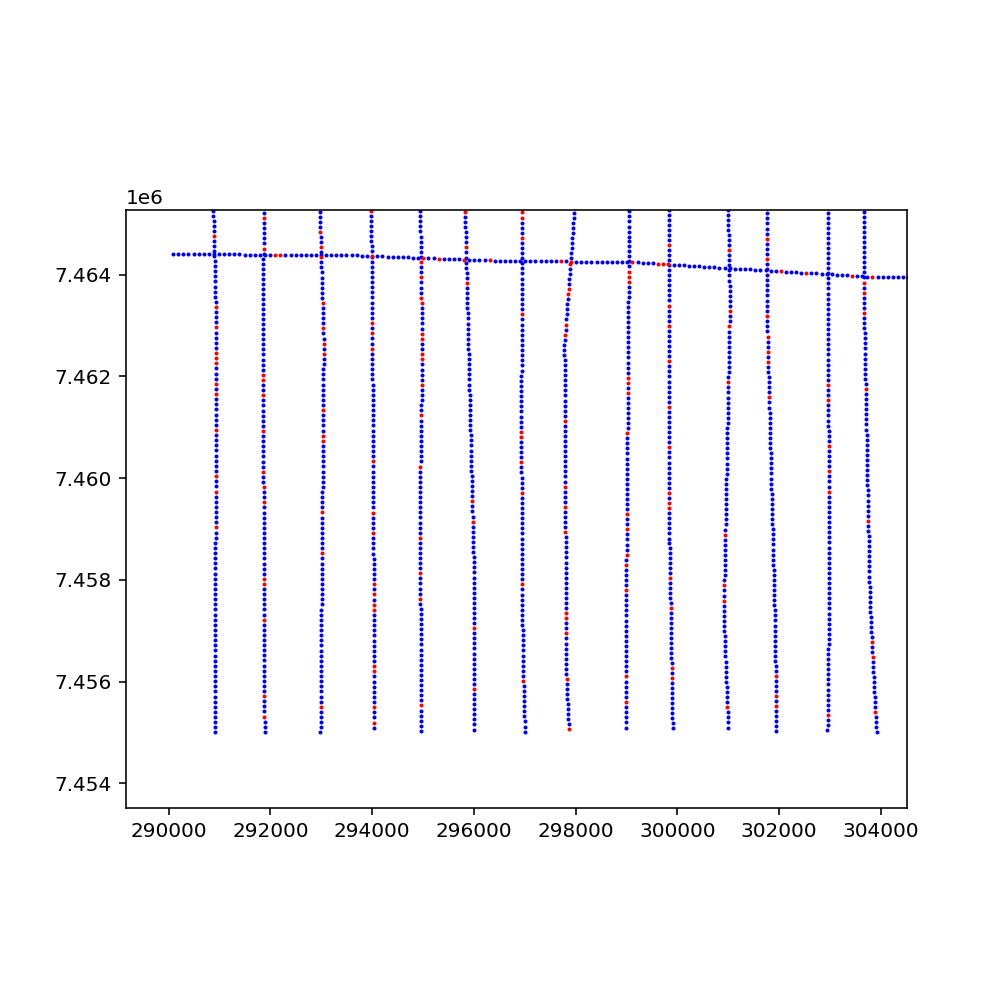

(287253.15, 347749.85, 7452251.2, 7512746.8)

In [160]:
plt.figure(figsize=(7,7))
plt.plot(train[0][0], train[0][1], '.b', markersize=2)
plt.plot(test[0][0], test[0][1], '.r', markersize=2)
plt.axis('scaled')

In [163]:
chain_MAGR.fit(*train)
# *train   ---> chain.fit(train[0], train[1])

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f9de8c7d550>,
                          spacing=1000)),
             ('spline', Spline())])

In [164]:
chain_MAGR.score(*test)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9247116842902181

In [185]:
train, test = vd.train_test_split(coordinates, scrr_1039.MAGR, test_size=0.1, spacing=500)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


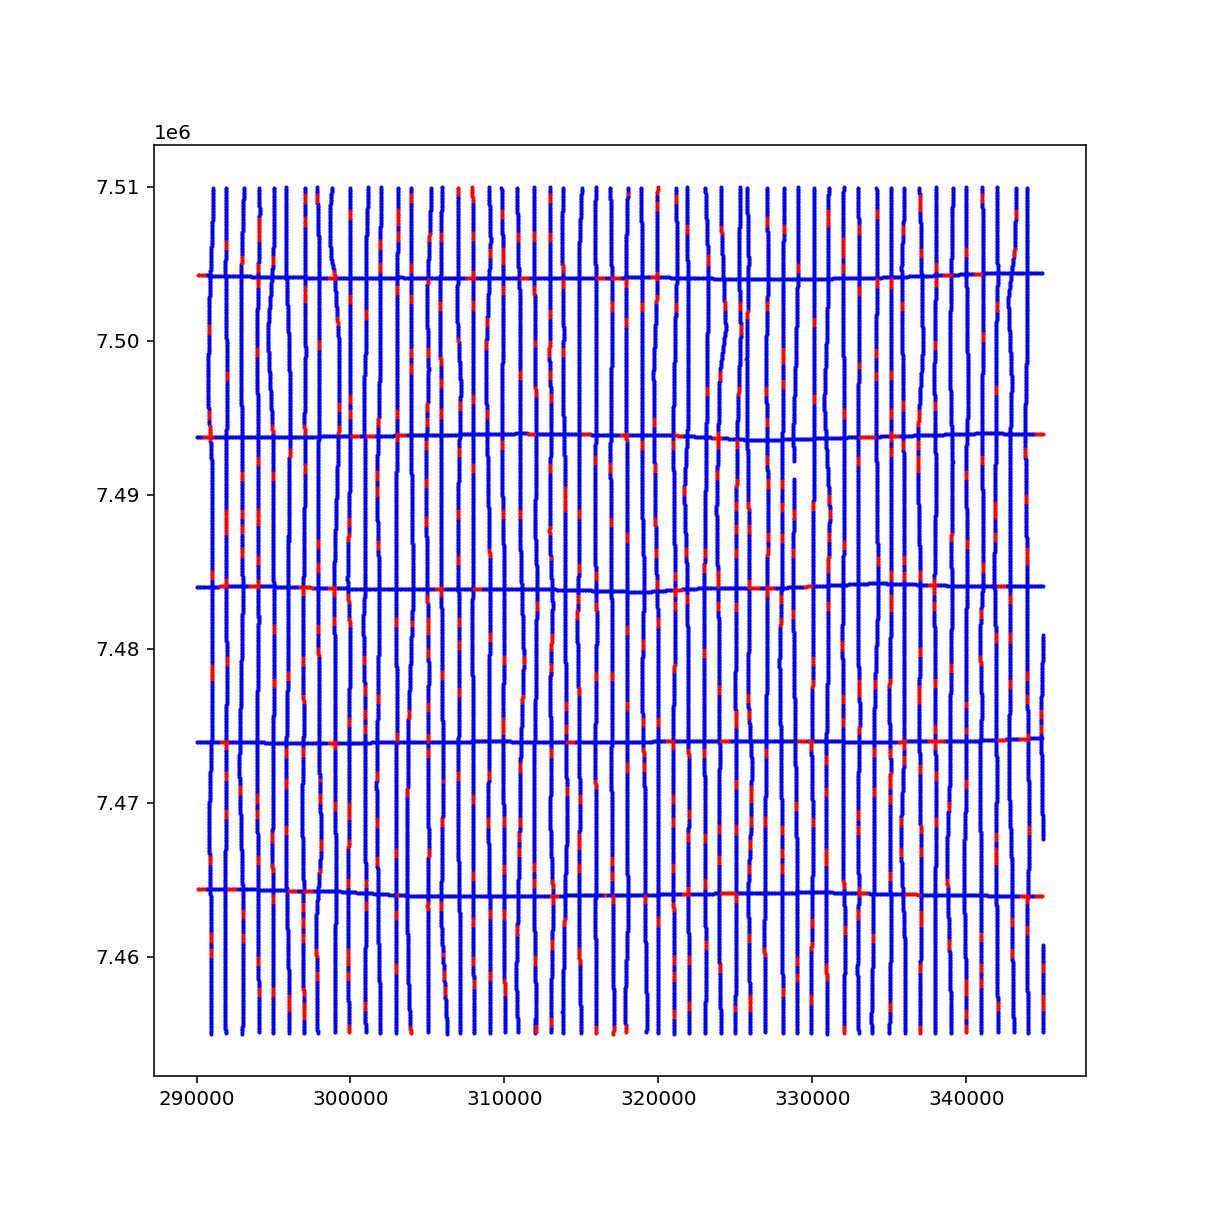

(287253.15, 347749.85, 7452251.2, 7512746.8)

In [186]:
plt.figure(figsize=(7,7))
plt.plot(train[0][0], train[0][1], '.b', markersize=2)
plt.plot(test[0][0], test[0][1], '.r', markersize=2)
plt.axis('scaled')

In [187]:
chain_MAGR.fit(*train)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f9de8c7d550>,
                          spacing=1000)),
             ('spline', Spline())])

In [188]:
chain_MAGR.score(*test)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8713704087592276

###  Cross-Validation

In [190]:
cv     = vd.BlockKFold(spacing=200,
                  n_splits=10,
                  shuffle=True)

scores = vd.cross_val_score(chain_MAGR,
                            coordinates,
                            scrr_1039.MAGR,
                            cv=cv)

In [191]:
scores

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.92738208, 0.91768944, 0.87180011, 0.91409414, 0.89796677,
       0.89528238, 0.89451495, 0.91429829, 0.91948665, 0.91994899])

<IPython.core.display.Javascript object>


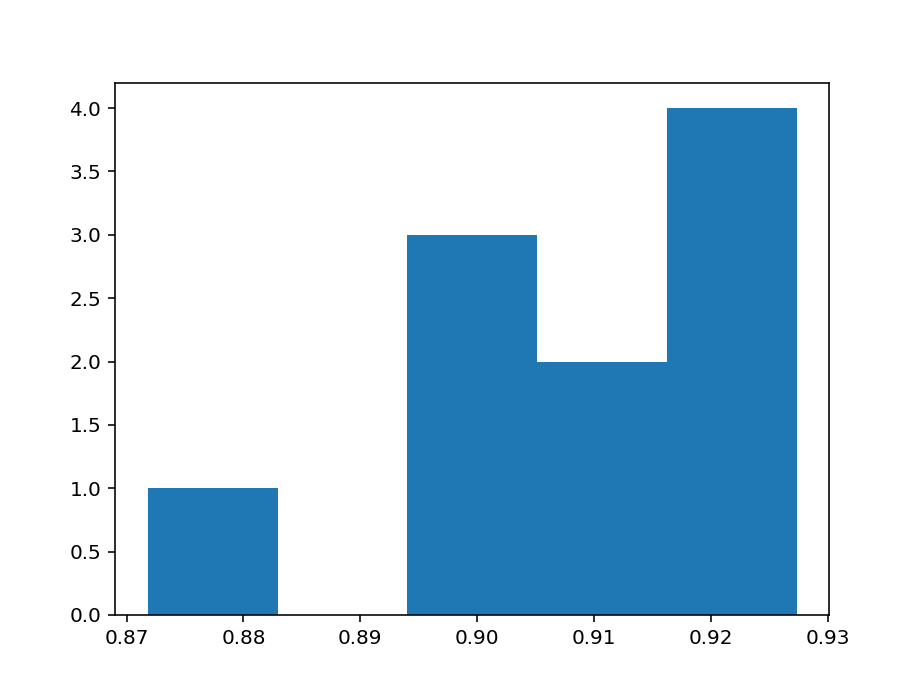

(array([1., 0., 3., 2., 4.]),
 array([0.87180011, 0.8829165 , 0.8940329 , 0.90514929, 0.91626569,
        0.92738208]),
 <BarContainer object of 5 artists>)

In [192]:
plt.figure()
plt.hist(scores, bins ='auto')